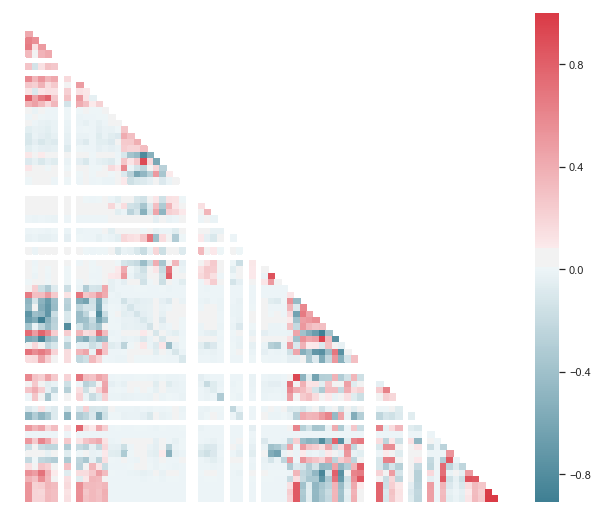

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")


d = pd.read_csv("../data/DF_train15noChangeContact_skempiAB_modeller_final.csv",index_col=0)
#d = pd.read_csv("../data/DF_train15_skempiAB_modeller_final.csv",index_col=0)


# Compute the correlation matrix
corr = d.drop("ddG_exp",axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, mask=mask, cmap=cmap,xticklabels=False,yticklabels=False)



In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

df =pd.read_csv("../data/DF_train15noChangeContact_skempiAB_modeller_final.csv",index_col=0)
#df =pd.read_csv("../data/DF_train400_skempiAB_modeller_final.csv",index_col=0)

df.shape

(1392, 78)

In [103]:
df.columns

Index(['clash', 'covalent', 'vdw_clash', 'vdw', 'proximal', 'hbond',
       'weak_hbond', 'xbond', 'ionic', 'metal_complex', 'aromatic',
       'hydrophobic', 'carbonyl', 'polar', 'weak_polar',
       'intraclashes_energy_1_change', 'intraclashes_energy_2_change',
       'dg_change', 'backbone_hbond_change', 'sidechain_hbond_change',
       'van_der_waals_change', 'electrostatics_change',
       'solvation_polar_change', 'solvation_hydrophobic_change',
       'van_der_waals_clashes_change', 'entropy_sidechain_change',
       'entropy_mainchain_change', 'sloop_entropy_change',
       'mloop_entropy_change', 'cis_bond_change', 'torsional_clash_change',
       'backbone_clash_change', 'helix_dipole_change', 'water_bridge_change',
       'disulfide_change', 'electrostatic_kon_change',
       'partial_covalent_bonds_change', 'energy_ionisation_change',
       'entropy_complex_change', 'interface_residues_change',
       'interface_residues_clashing_change',
       'interface_residues_vdw_cl

In [104]:
#standardizing data
ddg_scaled = StandardScaler().fit_transform(df['ddG_exp'][:,np.newaxis]);
low_range = ddg_scaled[ddg_scaled[:,0].argsort()][:20]
high_range= ddg_scaled[ddg_scaled[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.93179051]
 [-3.87865416]
 [-3.85269254]
 [-3.6782598 ]
 [-3.62555119]
 [-3.58858905]
 [-3.56708391]
 [-3.56259893]
 [-3.52406255]
 [-3.52406255]
 [-3.38475959]
 [-3.24615063]
 [-3.24015075]
 [-3.17659658]
 [-3.00410592]
 [-2.96262696]
 [-2.96262696]
 [-2.96262696]
 [-2.90783338]
 [-2.90057951]]

outer range (high) of the distribution:
[[2.90057951]
 [2.90783338]
 [2.96262696]
 [2.96262696]
 [2.96262696]
 [3.00410592]
 [3.17659658]
 [3.24015075]
 [3.24615063]
 [3.38475959]
 [3.52406255]
 [3.52406255]
 [3.56259893]
 [3.56708391]
 [3.58858905]
 [3.62555119]
 [3.6782598 ]
 [3.85269254]
 [3.87865416]
 [3.93179051]]


In [105]:
#df_pairs_ddG = df.iloc[:,:400].mul(df["dg_change"],axis=0) # Funciona bien, aumenta numero de variablse con 0.2 corr
#df_pairs_ddG = df.iloc[:,:400].mul(df["van_der_waals_change"],axis=0) #Funciona, aumenta mas aun el numero de variables con 0.3 corr
df_pairs_ddG = df.iloc[:,:15].mul(df["van_der_waals_change"],axis=0)# funciona mucho mejor
df_pairs_ddG.columns =df_pairs_ddG.columns.str[:]+"_vdw_change_interaction"

In [106]:
df = df.join(df_pairs_ddG)

In [107]:
#filter all zero columns
cols_selected = df.columns[(df != 0).any(axis=0)]
df_zerofiltered = df.loc[:, cols_selected]

In [108]:
#df_zerofiltered.to_csv("../data/DF_contact15_energy_sasa.skempiAB.Zero.csv")

In [109]:
#with open('cols_selected_zero15skempiAB.pickle', 'wb') as f:
#    # Pickle the 'data' dictionary using the highest protocol available.
#    pickle.dump(cols_selected, f, pickle.HIGHEST_PROTOCOL)

In [110]:
corr_matrix = df.corr()#.abs()
corr_droptarget = df.drop('ddG_exp',axis=1).corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
print(corr_matrix['ddG_exp'].sort_values(ascending=False).round(6))

ddG_exp                                   1.000000
hbond_vdw_change_interaction              0.382342
polar_vdw_change_interaction              0.374269
weak_polar_vdw_change_interaction         0.373940
vdw_clash_vdw_change_interaction          0.371216
van_der_waals_change                      0.360533
weak_hbond_vdw_change_interaction         0.354260
proximal_vdw_change_interaction           0.351859
vdw_vdw_change_interaction                0.333132
hydrophobic_vdw_change_interaction        0.314744
solvation_hydrophobic_change              0.302313
aromatic_vdw_change_interaction           0.247734
ionic_vdw_change_interaction              0.239326
carbonyl_vdw_change_interaction           0.219797
sidechain_hbond_change                    0.163980
electrostatics_change                     0.150358
electrostatic_kon_change                  0.141315
dg_change                                 0.135969
backbone_hbond_change                     0.081380
van_der_waals_mut              

In [ ]:
hbond_ddG_chage                           0.382342
polar_ddG_chage                           0.374269
weak_polar_ddG_chage                      0.373940
vdw_clash_ddG_chage                       0.371216
van_der_waals_change                      0.360533
weak_hbond_ddG_chage                      0.354260
proximal_ddG_chage                        0.351859
vdw_ddG_chage                             0.333132
hydrophobic_ddG_chage                     0.314744
solvation_hydrophobic_change              0.302313
aromatic_ddG_chage                        0.247734
ionic_ddG_chage                           0.239326
carbonyl_ddG_chage                        0.219797
sidechain_hbond_change                    0.163980
electrostatics_change                     0.150358
electrostatic_kon_change                  0.141315
dg_change                                 0.135969

In [5]:
corr_matrix = df_zerofiltered.corr()#.abs()
corr_droptarget = df_zerofiltered.drop('ddG_exp',axis=1).corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
print(corr_matrix['ddG_exp'].sort_values(ascending=False).head(100)*100)

NameError: name 'df_zerofiltered' is not defined

In [10]:
corr_to_target = corr_matrix['ddG_exp'].sort_values(ascending=False)


In [11]:
top_correlated = corr_to_target.index[corr_matrix['ddG_exp'].sort_values(ascending=False) > 0.1]

In [12]:
top_correlated

Index(['ddG_exp', 'hbond', 'intraclashes_energy_1_wt', 'helix_dipole_wt',
       'dg_change', 'dg_wt', 'van_der_waals_clashes_wt', 'if_phil',
       'entropy_sidechain_wt', 'torsional_clash_wt', 'if_total',
       'backbone_hbond_wt', 'interface_residues_wt', 'hydrophobic',
       'solvation_hydrophobic_wt', 'van_der_waals_wt', 'electrostatics_wt',
       'interface_residues_clashing_wt', 'energy_ionisation_change',
       'interface_residues_bb_clashing_wt', 'proximal', 'sidechain_hbond_wt',
       'solvation_polar_wt', 'polar', 'cis_bond_change', 'if_phob',
       'entropy_mainchain_wt', 'weak_hbond', 'covalent', 'backbone_clash_wt'],
      dtype='object')

In [33]:
matrix = corr_droptarget.where(np.triu(np.ones(corr_droptarget.shape), k=1).astype(np.bool))

In [34]:
to_drop = [column for column in matrix.columns if any(matrix[column] > 0.7)]
to_drop_notwithtarget = [column for column in to_drop if column not in top_correlated]

In [ ]:
# ickle todrop not in target
with open('drop_correlated.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(to_drop_notwithtarget, f, pickle.HIGHEST_PROTOCOL)

In [35]:
df_zerofiltered.drop(to_drop_notwithtarget,axis=1,inplace=True)

In [38]:
to_drop_notwithtarget

['proximal',
 'weak_hbond',
 'polar',
 'solvation_polar_change',
 'solvation_hydrophobic_change',
 'interface_residues_vdw_clashing_change',
 'sidechain_hbond_wt',
 'van_der_waals_wt',
 'solvation_polar_wt',
 'interface_residues_wt',
 'interface_residues_vdw_clashing_wt',
 'if_phob']

In [58]:
df_zerofiltered.to_csv("../data/DF_contact400_energy_sasa.FcorrZero.csv",index=True)

In [64]:
minmax = MinMaxScaler().fit(df_zerofiltered.drop('ddG_exp',axis=1))
Xminmax = minmax.transform(df_zerofiltered.drop('ddG_exp',axis=1))

In [13]:
df_zerofiltered.loc[:,~(Xminmax.var(axis=0) < 0.002)]

NameError: name 'Xminmax' is not defined

In [105]:
df_zerofiltered['entropy_complex_wt']

1AK4.mut.0_Repair.clean.pdb         2.384
1AK4.mut.1_Repair.clean.pdb         2.384
1AK4.mut.2_Repair.clean.pdb         2.384
1AK4.mut.3_Repair.clean.pdb         2.384
1AK4.mut.4_Repair.clean.pdb         2.384
1AK4.mut.5_Repair.clean.pdb         2.384
1AK4.mut.6_Repair.clean.pdb         2.384
1AK4.mut.7_Repair.clean.pdb         2.384
1AK4.mut.8_Repair.clean.pdb         2.384
1AK4.mut.9_Repair.clean.pdb         2.384
1AK4.mut.10_Repair.clean.pdb        2.384
1AK4.mut.11_Repair.clean.pdb        2.384
1AK4.mut.12_Repair.clean.pdb        2.384
1AK4.mut.13_Repair.clean.pdb        2.384
1AK4.mut.14_Repair.clean.pdb        2.384
1AK4.mut.15_Repair.clean.pdb        2.384
1BJ1.mut.16_Repair.clean.pdb        2.384
1BJ1.mut.17_Repair.clean.pdb        2.384
1BJ1.mut.18_Repair.clean.pdb        2.384
1BJ1.mut.19_Repair.clean.pdb        2.384
1BJ1.mut.20_Repair.clean.pdb        2.384
1BJ1.mut.21_Repair.clean.pdb        2.384
1BJ1.mut.22_Repair.clean.pdb        2.384
1BJ1.mut.23_Repair.clean.pdb      

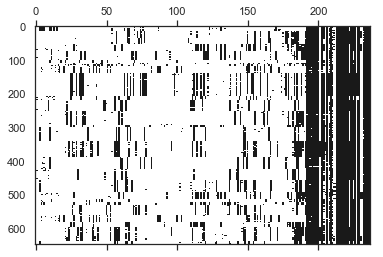

In [59]:
plt.spy(df_zerofiltered.values,aspect='auto')

In [ ]:
sns.pairplot(df_zerofiltered.drop('ddG_exp',axis=1))

KeyboardInterrupt: 